In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [13]:
#Get univariate time series data
df = pd.read_excel('../load_data/BSP_Total.xlsx')

In [14]:
# Convert the 'datetime' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Extract date and time into separate columns
df['date'] = df['Date/Time'].dt.date
df['time'] = df['Date/Time'].dt.time

C:\Users\chrap\AppData\Local\Temp\ipykernel_26344\728372586.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date/Time'] = pd.to_datetime(df['Date/Time'])


In [15]:
# Drop the original 'Date/time' column if desired
df.drop(columns=['Date/Time'], inplace=True)

#Rearrange the columns
df = df[['date', 'time', 'Total kW','Total kVA','Total kVAr','PF']]

df.head(3)

,date,time,Total kW,Total kVA,Total kVAr,PF
0,2020-12-31,01:00:00,19310.0,20320.0,6326.634176,0.950295
1,2020-12-31,02:00:00,18510.0,19490.0,6102.458521,0.949718
2,2020-12-31,03:00:00,18040.0,19040.0,6089.334939,0.947479


Text(0.5, 1.0, 'Box Plot of Power (kW)')

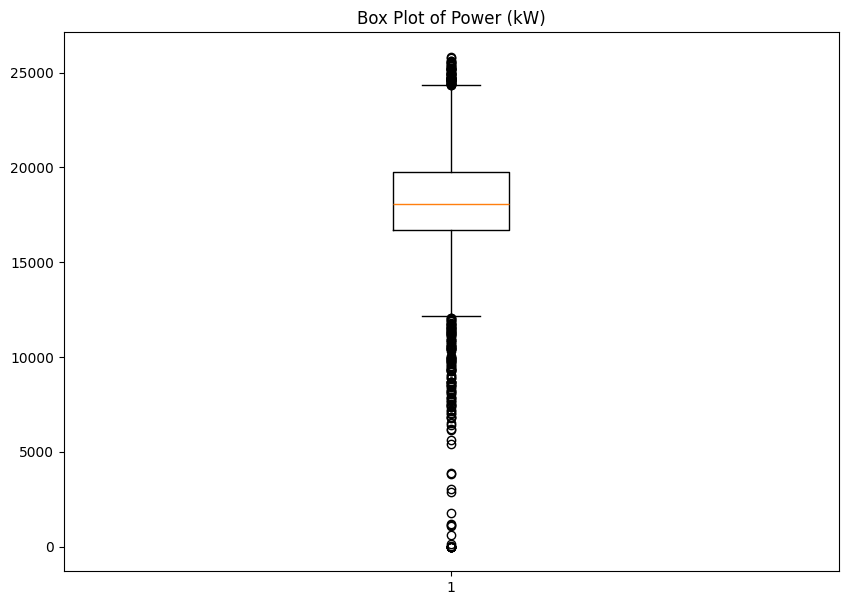

In [26]:
#Create a box plot to find the IQR,max and minimum
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df['Total kW'])
plt.title('Box Plot of Power (kW)')

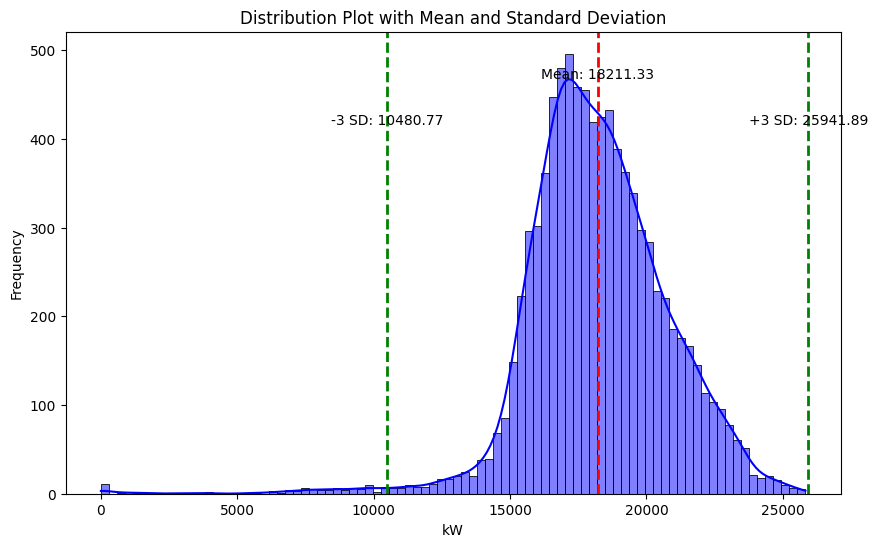

In [27]:
#distribution plot
# Calculate mean and standard deviation
mean = df['Total kW'].mean()

#deviation factor to cap the maximum point
deviation_factor = 3 #for the full data,3 is standard
std_dev = deviation_factor*df['Total kW'].std()

# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Total kW'], kde=True, color='blue')

# Mark the mean
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)
plt.text(mean, plt.gca().get_ylim()[1] * 0.9, f'Mean: {mean:.2f}', color='black', ha='center')

# Mark the standard deviation
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=2)
plt.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=2)
plt.text(mean - std_dev, plt.gca().get_ylim()[1] * 0.8, f'-3 SD: {mean - std_dev:.2f}', color='black', ha='center')
plt.text(mean + std_dev, plt.gca().get_ylim()[1] * 0.8, f'+3 SD: {mean + std_dev:.2f}', color='black', ha='center')

# Add titles and labels
plt.title('Distribution Plot with Mean and Standard Deviation')
plt.xlabel('kW')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [7]:
# Calculate the IQR for the 'kW' column
Q1 = df['Total kW'].quantile(0.25)
Q3 = df['Total kW'].quantile(0.75)
IQR = Q3 - Q1
max = Q3+(1.5*IQR)

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

Q1: 16696.612
Q3: 19760.97425
IQR: 3064.3622499999983


In [29]:
#find the peak outliers
outliers_above_max = df[df['Total kW'] > max]

print(f"Statistical Max: {max}")

print(len(outliers_above_max))
print("Rows with Power above max:")
print(outliers_above_max)


Statistical Max: 24357.517624999997
58
Rows with Power above max:
            date      time   Total kW  Total kVA    Total kVAr        PF
1245  2021-02-20  22:00:00  24370.000  25710.000   8191.898437  0.947880
1293  2021-02-22  22:00:00  24390.000  25680.000   8036.809068  0.949766
2348  2021-07-04  21:00:00  24633.690  29414.729  16075.061404  0.837461
2492  2021-04-13  21:00:00  24592.106  26538.861   9976.946710  0.926645
2493  2021-04-13  22:00:00  24455.433  26366.188   9854.322221  0.927530
7392  2021-04-11  01:00:00  24879.044  26594.719   9397.459675  0.935488
7652  2021-11-14  21:00:00  24416.949  32670.904  21707.154805  0.747361
7796  2021-11-20  21:00:00  24369.112  27533.658  12815.955025  0.885066
7891  2021-11-24  20:00:00  24875.083  32540.987  20979.658736  0.764423
7892  2021-11-24  21:00:00  24698.487  33045.367  21954.066140  0.747411
7915  2021-11-25  20:00:00  24529.728  34310.128  23989.108521  0.714941
7916  2021-11-25  21:00:00  24692.319  37905.860  28760.10

In [30]:
outliers_above_max.dropna(inplace=True)
print(len(outliers_above_max))

58


C:\Users\chrap\AppData\Local\Temp\ipykernel_26344\2903100481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_above_max.dropna(inplace=True)


27773.993848771184
Empty DataFrame
Columns: [date, time, Total kW, Total kVA, Total kVAr, PF]
Index: []
28250.505273839302
Empty DataFrame
Columns: [date, time, Total kW, Total kVA, Total kVAr, PF]
Index: []
24589.194061305243
            date      time   Total kW  Total kVA   Total kVAr        PF
7392  2021-04-11  01:00:00  24879.044  26594.719  9397.459675  0.935488
28032.931222068186
Empty DataFrame
Columns: [date, time, Total kW, Total kVA, Total kVAr, PF]
Index: []
26598.921622613143
Empty DataFrame
Columns: [date, time, Total kW, Total kVA, Total kVAr, PF]
Index: []


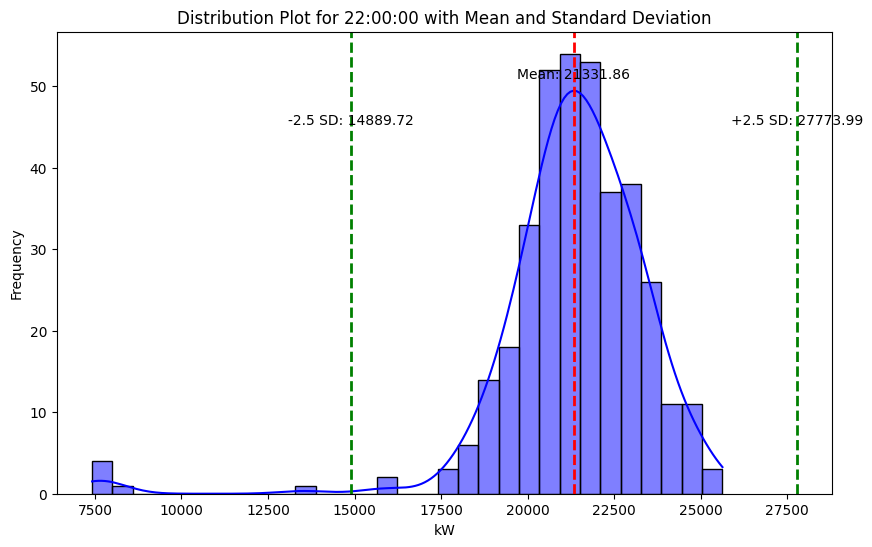

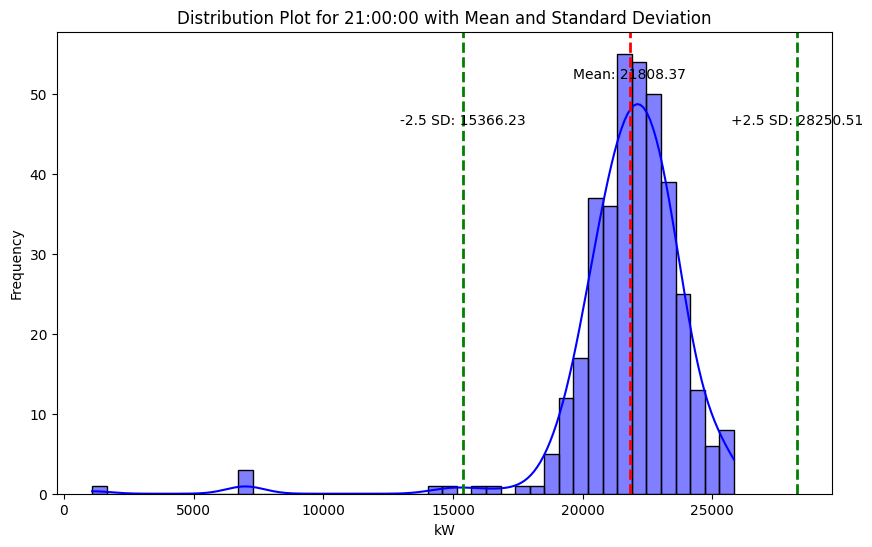

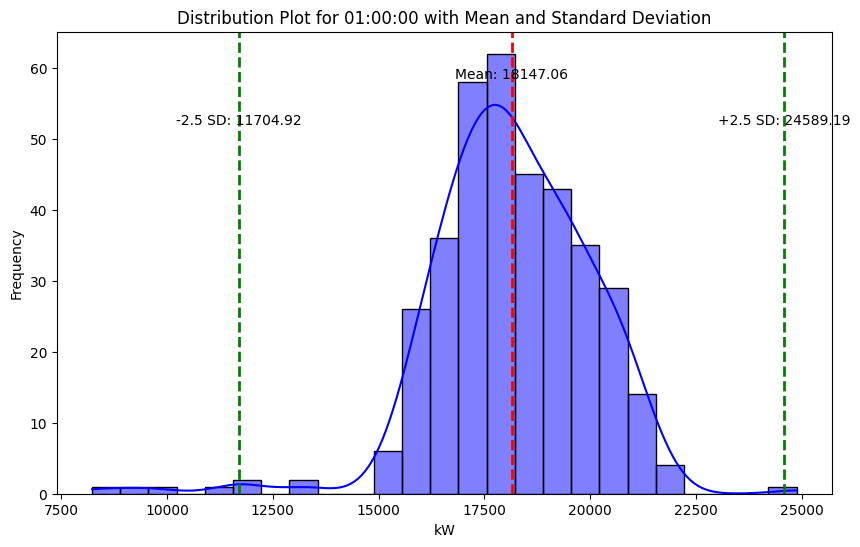

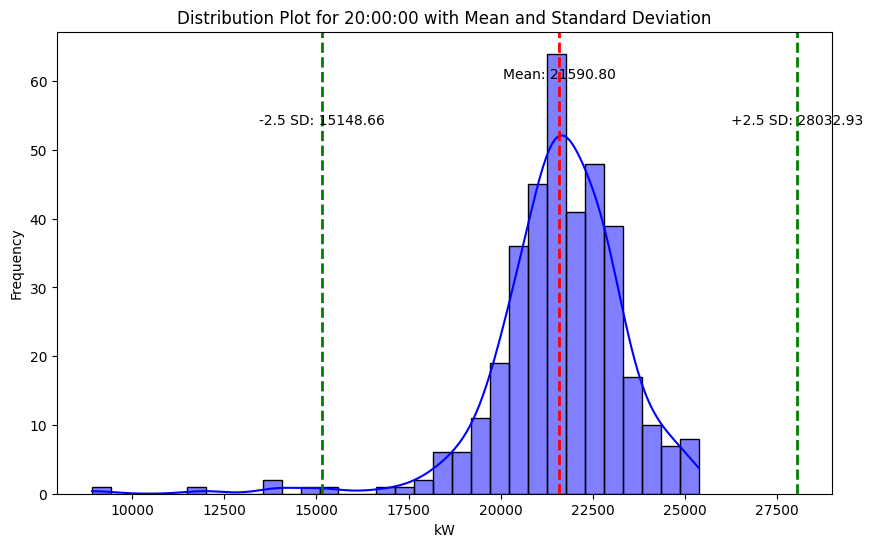

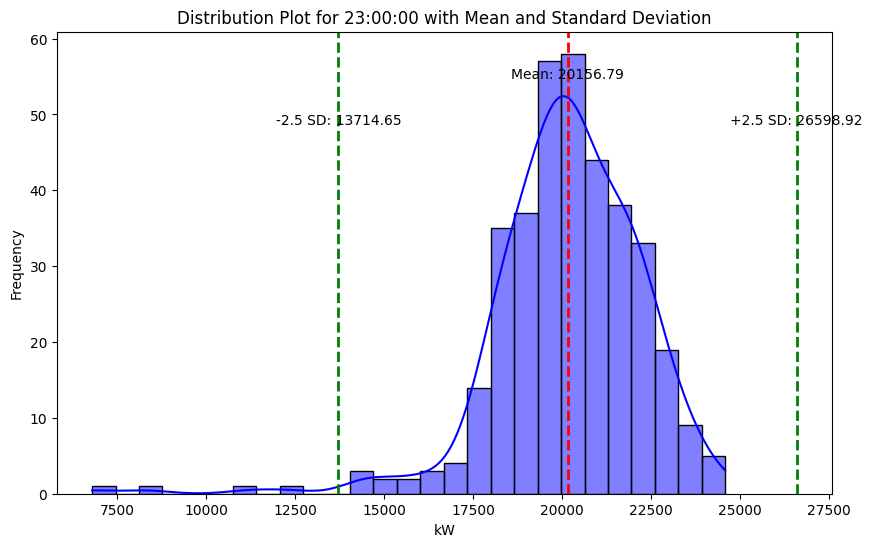

In [31]:

#unique hour times of peaks
times = outliers_above_max['time'].unique()
times
for time in times:
    hour = df[df['time'] == time]
       
    # Calculate the mean of the 'age' column
    mean = hour['Total kW'].mean()

    # Calculate the standard deviation of the Power column
    deviation_factor = 2.5 #for the full data,3 is standard
    std_dev = deviation_factor*df['Total kW'].std()
    

    # Create the distribution plot
    plt.figure(figsize=(10, 6))
    sns.histplot(hour['Total kW'], kde=True, color='blue')

    # Mark the mean
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)
    plt.text(mean, plt.gca().get_ylim()[1] * 0.9, f'Mean: {mean:.2f}', color='black', ha='center')

    # Mark the standard deviation
    plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=2)
    plt.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=2)
    plt.text(mean - std_dev, plt.gca().get_ylim()[1] * 0.8, f'-2.5 SD: {mean - std_dev:.2f}', color='black', ha='center')
    plt.text(mean + std_dev, plt.gca().get_ylim()[1] * 0.8, f'+2.5 SD: {mean + std_dev:.2f}', color='black', ha='center')

    # Add titles and labels
    plt.title(f'Distribution Plot for {time} with Mean and Standard Deviation')
    plt.xlabel('kW')
    plt.ylabel('Frequency')








    #### Filter the DataFrame to get rows where 'age' is greater than 30
    ages_above_30 = hour[hour['Total kW'] > (mean + (std_dev) )]
    tot = mean + (std_dev)
    print(tot )
    print(ages_above_30)

# Get the indices of these rows
    #locations = ages_above_30.index.tolist()



In [11]:
#list all time points
#pick one time point,find mean,std and how many were above twoXstd
#now do all